## Sentiment Analysis

In [138]:
# Importar librerias

import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
## Lectura de archivo
df_s = pd.read_csv('3. Sentiment analysis.tsv', sep='\t', chunksize=50)
for df in df_s:
    df.to_csv('Sentiment analysis.csv', sep=',', mode='a')

In [141]:
df = pd.read_csv("Sentiment analysis.csv")
df.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0.0,1,1,A series of escapades demonstrating the adage ...,1
1,1.0,2,1,A series of escapades demonstrating the adage ...,2
2,2.0,3,1,A series,2
3,3.0,4,1,A,2
4,4.0,5,1,series,2


In [142]:
df.shape

(318363, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


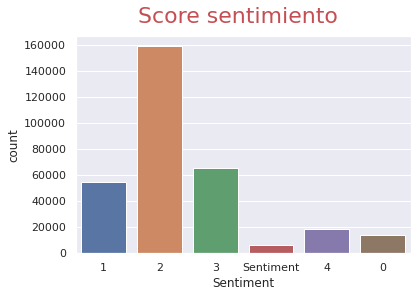

In [143]:
plt.suptitle("Score sentimiento", fontsize=22, color = "r")
sns.countplot(df.Sentiment)
plt.show();

In [144]:
## Se hace una pequeña exploración de los datos 
index_random = np.random.randint(0,high = df.shape[0])
titular = df.iloc[index_random].Phrase
print(index_random, titular)

307065 use a few good laughs


In [145]:
print(index_random, df.iloc[index_random].Sentiment)

307065 3


A continuación se inicia a extraer caracteristicas de los textos que sirvan para saber el sentimiento a cerca de la reseña



In [146]:
## Tokenización 

titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

['use a few good laughs']

In [147]:
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['use', 'a', 'few', 'good', 'laughs']

In [148]:
## Normalización

stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [149]:
len(stopwords)

178

In [150]:
# Eliminar del titular elegido los stopwords
titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]
titular_wt_sin_sw

['use', 'good', 'laughs']

In [151]:
## Frecuencia de palabras 
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'good': 1, 'laughs': 1, 'use': 1})

In [152]:
### Definir en 2 Categorias los sentimientos buenos y malos

df["Sentiment"]=df["Sentiment"].replace({"0": 0, "Sentiment": 0,"1": 0,"2":1, "3":1,"4":1})

In [153]:
#### Separar  datos entre sentimientos buenos y malos

filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("nwe")


df_mal_sentimiento = df.query('Sentiment==0')
df_mal_sentimiento.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0.0,1,1,A series of escapades demonstrating the adage ...,0
33,33.0,34,1,"the gander , some of which occasionally amuses...",0
47,47.0,48,1,but none of which amounts to much of a story,0
49,49.0,50,1,none of which amounts to much of a story,0
50,NaN,PhraseId,SentenceId,Phrase,0


In [154]:
df_mal_sentimiento.Sentiment.unique()

array([0])

In [155]:
todos_titulares_mal_sentimiento = []
for i in range(df_mal_sentimiento.shape[0]):
    titular = df_mal_sentimiento.iloc[i].Phrase
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

    todos_titulares_mal_sentimiento.append(titular)

In [156]:
todos_titulares_mal_sentimiento = list(itertools.chain(*todos_titulares_mal_sentimiento))
todos_titulares_mal_sentimiento[0:10]

['A',
 'series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander']

In [157]:
len(todos_titulares_mal_sentimiento)

384885

In [158]:
freq_mal_sentimiento = nltk.FreqDist(todos_titulares_mal_sentimiento)
freq_mal_sentimiento

FreqDist({'A': 1338,
          'series': 262,
          'escapades': 2,
          'demonstrating': 10,
          'adage': 4,
          'good': 842,
          'goose': 6,
          'also': 298,
          'gander': 4,
          'occasionally': 66,
          'amuses': 4,
          'none': 210,
          'amounts': 68,
          'much': 1400,
          'story': 1314,
          'Phrase': 6243,
          'Even': 54,
          'fans': 144,
          'Ismail': 2,
          'Merchant': 6,
          'work': 610,
          'I': 1366,
          'suspect': 20,
          'would': 982,
          'hard': 560,
          'time': 1102,
          'sitting': 104,
          'one': 2054,
          'intrigue': 64,
          'betrayal': 8,
          'deceit': 10,
          'murder': 60,
          'Shakespearean': 8,
          'tragedy': 106,
          'soap': 258,
          'opera': 278,
          'Aggressive': 4,
          'self': 812,
          'glorification': 10,
          'manipulative': 146,
          'w

In [159]:
## Poner las frases en un dataframe
mal_sentimiento = pd.DataFrame(list(freq_mal_sentimiento.items()), columns = ["Word","Frequency"])
mal_sentimiento.head()

,Word,Frequency
0,A,1338
1,series,262
2,escapades,2
3,demonstrating,10
4,adage,4


In [160]:
### Ordenar los datos
mal_sentimiento.sort_values('Frequency',ascending=False, inplace = True)
mal_sentimiento.head()

,Word,Frequency
15,Phrase,6243
206,movie,4478
50,n,3894
192,film,3494
390,not,2830


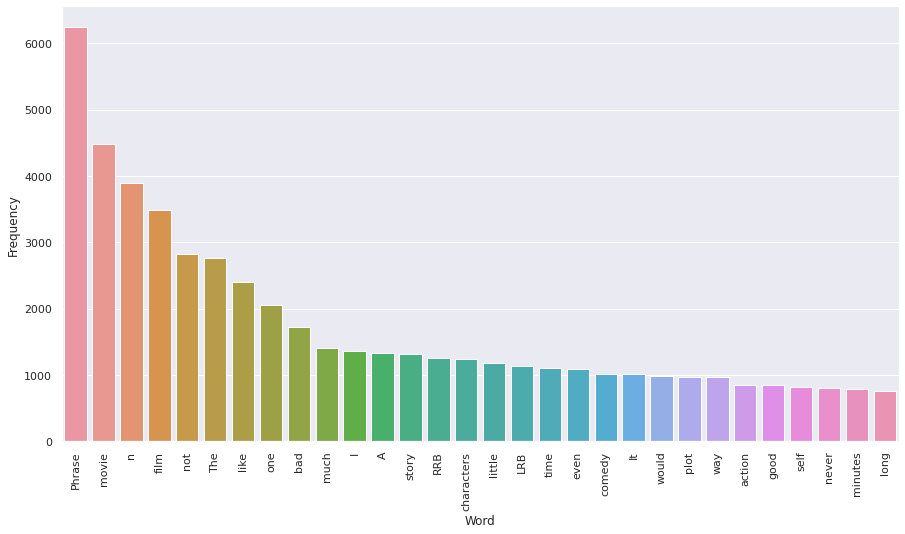

In [161]:
###  Grafico
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = mal_sentimiento.iloc[:30].Word, y = mal_sentimiento.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show();

In [162]:
#### Buenos sentimientos

df_buen_sentimiento = df.query('Sentiment==1')
df_buen_sentimiento.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
1,1.0,2,1,A series of escapades demonstrating the adage ...,1
2,2.0,3,1,A series,1
3,3.0,4,1,A,1
4,4.0,5,1,series,1
5,5.0,6,1,of escapades demonstrating the adage that what...,1


In [163]:
df_buen_sentimiento.Sentiment.unique()

array([1])

In [164]:
todos_titulares_buen_sentimiento = []
for i in range(df_buen_sentimiento.shape[0]):
    titular = df_buen_sentimiento.iloc[i].Phrase
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
    todos_titulares_buen_sentimiento.append(titular)

In [165]:
todos_titulares_buen_sentimiento = list(itertools.chain(*todos_titulares_buen_sentimiento))
todos_titulares_buen_sentimiento[0:10]

['A',
 'series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'A',
 'series',
 'A']

In [166]:
freq_buen_sentimiento = nltk.FreqDist(todos_titulares_buen_sentimiento)
freq_buen_sentimiento

FreqDist({'A': 4222,
          'series': 464,
          'escapades': 8,
          'demonstrating': 28,
          'adage': 30,
          'good': 3524,
          'goose': 64,
          'also': 1020,
          'gander': 14,
          'occasionally': 286,
          'amuses': 16,
          'none': 130,
          'amounts': 52,
          'much': 2260,
          'story': 3622,
          'This': 786,
          'quiet': 222,
          'introspective': 34,
          'entertaining': 1064,
          'independent': 62,
          'worth': 814,
          'seeking': 68,
          'Even': 164,
          'fans': 638,
          'Ismail': 10,
          'Merchant': 44,
          'work': 1902,
          'I': 2242,
          'suspect': 26,
          'would': 1282,
          'hard': 810,
          'time': 2430,
          'sitting': 102,
          'one': 4996,
          'positively': 36,
          'thrilling': 24,
          'combination': 104,
          'ethnography': 14,
          'intrigue': 194,
          '

In [167]:
buen_sentimiento = pd.DataFrame(list(freq_buen_sentimiento.items()), columns = ["Word","Frequency"])
buen_sentimiento.head()

,Word,Frequency
0,A,4222
1,series,464
2,escapades,8
3,demonstrating,28
4,adage,30


In [168]:
buen_sentimiento.sort_values('Frequency',ascending=False, inplace = True)
buen_sentimiento.head()

,Word,Frequency
217,film,9846
161,movie,7848
69,The,6568
33,one,4996
0,A,4222


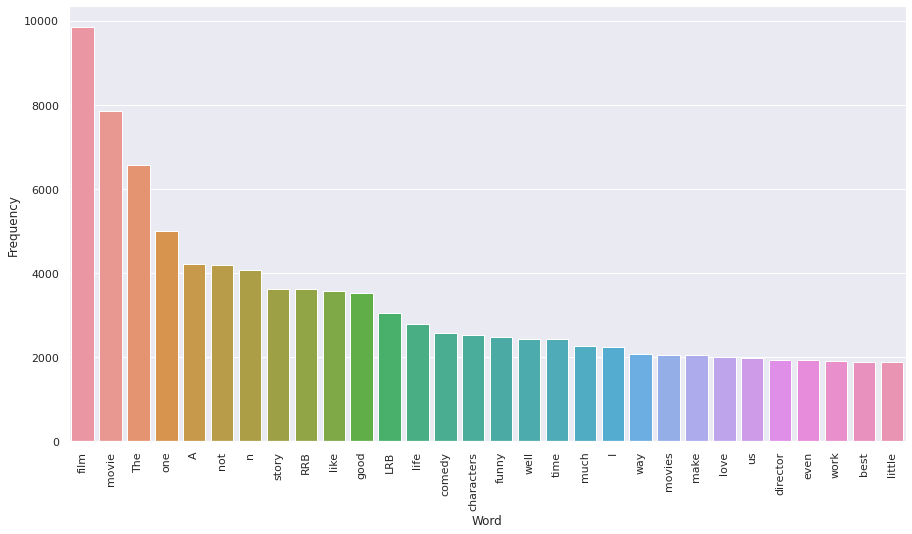

In [169]:
buen_sentimiento.reset_index(drop = True, inplace=True)

plt.figure(figsize = (15,8))
plot = sns.barplot(x  = buen_sentimiento.iloc[:30].Word, y = buen_sentimiento.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Stemming

Agrupación de palabras por su raíz

In [170]:
## Lectura nuevamente
df = pd.read_csv("/content/Sentiment analysis.csv")

df["Sentiment"]=df["Sentiment"].replace({"0": 0, "Sentiment": 0,"1": 0,"2":1, "3":1,"4":1})

## Tomar solo la columna de interes del dataset
df=pd.concat([df.Phrase,df.Sentiment],axis=1)
df.dropna(axis=0,inplace=True)  # Si hay alguna nan, se retira esa instancia

Se normaliza el texto como se empleo anteriormente antes de hacer el Stemming

In [171]:
# Importar libreria para reemplzar caracteres
import re

# Importar función que  permite Stemmizar de nltk y definiendo el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traer nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')


In [172]:
# Recorrer todos los titulos y aplicar la Normalizacion y luega el Stemming a cada uno

titular_list=[]
for titular in df.Phrase:
    # reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasar todo a minúsculas
    titular=titular.lower()
    # Tokenizar para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminar las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacar las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá se normaliza, ahora a stemmizar
    
    # Aplicar la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # volver a unir el titular
    titular=" ".join(titular)
    
    # armar una lista con todos los titulares
    titular_list.append(titular)


In [173]:
### Agregar una nueva columna al dataset
df["titular_stem"] = titular_list
df.tail()

,Phrase,Sentiment,titular_stem
318358,Hearst 's,1,hearst
318359,forced avuncular chortles,0,forc avuncular chortl
318360,avuncular chortles,1,avuncular chortl
318361,avuncular,1,avuncular
318362,chortles,1,chortl


In [174]:
df_stem=pd.concat([df.titular_stem,df.Sentiment],axis=1)
df_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
df_stem.head()

,titular_stem,Sentiment
0,seri escapad demonstr adag good goos also good...,0
1,seri escapad demonstr adag good goos,1
2,seri,1
3,,1
4,seri,1


## Vectorización

Representar cada reseña por un vector que contiene el sentimiento, se trabaja únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces novan a brindar información que se pueda generalizar

In [175]:
#Se Toma la lista de palabras y el vector que  nos dice el sentimiento
list_reseña = list(df_stem['titular_stem'].values)
is_buena = df_stem['Sentiment'].values

In [176]:
from sklearn.feature_extraction.text import CountVectorizer

# Se toman solo las 1000 palabras con mas frecuencia en toda la frase para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [177]:
matriz_reseña = cou_vec.fit_transform(list_reseña)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abil', 'abl', 'absorb', 'absurd', 'accept', 'accomplish', 'achiev', 'across', 'act', 'action', 'actor', 'actress', 'actual', 'adam', 'adapt', 'admir', 'adolesc', 'adult', 'adventur', 'affect', 'affirm', 'age', 'alien', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'alway', 'ambiti', 'america', 'american', 'among', 'amount', 'amus', 'anim', 'annoy', 'anoth', 'answer', 'anti', 'anyon', 'anyth', 'apart', 'appar', 'appeal', 'appear', 'appreci', 'approach']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Modelado

In [178]:
### Partición de variables
x = matriz_reseña.toarray()
y = is_buena

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y)

In [179]:
##función que  permite plotear los resultados en una matriz de confusión.

from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    #names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

    return

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.8703846214250939


El modelo empleado presenta un buen accuracy, donde es importante revisar otras metricas para evaluar el desempeño del modelo

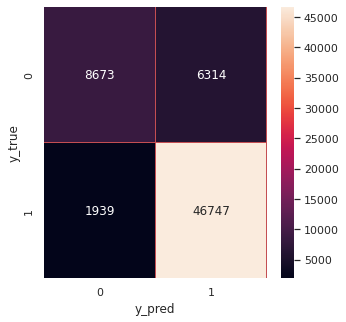

In [181]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

En la matriz de confusión se pueden ver las diferentes categorias de 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


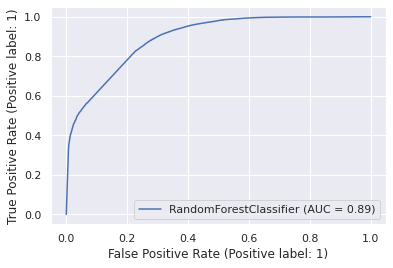

In [182]:
# Importar curva ROC
from sklearn.metrics import plot_roc_curve

# Graficar curva
plot_roc_curve(rf,xtest,ytest);

Se emplea la curva ROC para de entender el rendimiento del modelo comparando la tasa de verdaderos positivos con la tasa de falsos positivos. Donde el área bajo la curva nos da un puntaje de 89% lo que indica que el modelo esta funcionando bien en teoria

In [183]:
## Revisar otras metrícas
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.58      0.68     14987
           1       0.88      0.96      0.92     48686

    accuracy                           0.87     63673
   macro avg       0.85      0.77      0.80     63673
weighted avg       0.87      0.87      0.86     63673



El modelo presenta mejor precisión en la categoria con buenas reseña cuando la encuentra cuenta con buena presición, y el modelo tiene porcentajes mas bajos con la clase de malas reseñas. Adicional a esto, se cuenta con un f1 bueno

A continuación se revisa cuales son las palabras que mayormente determinan el sentimiento para este clasificador

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


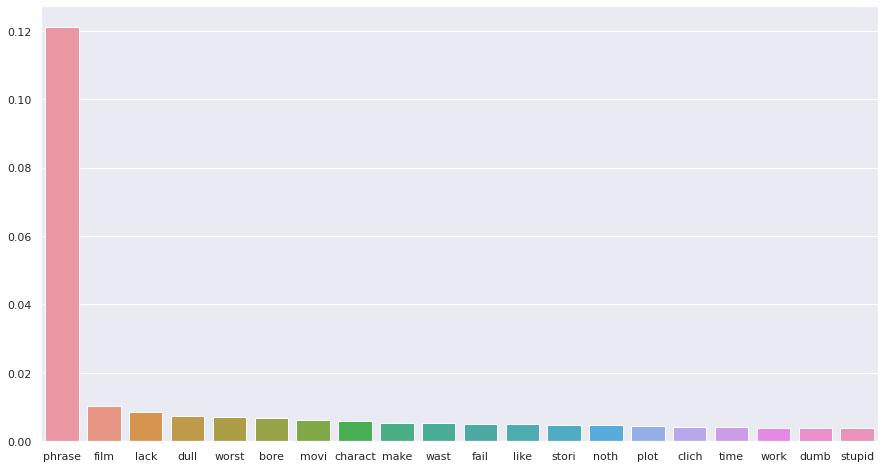

In [184]:
#la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenar por importnacia y se toman las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

#grafico
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

Se puede ver que a diferencia de la palabra frase y película, dentro del top 5 de palabras mas importante para el modelo se encuentran frases asociadas al sentimiento de la reseña o titular de la película como: falta, aburrido,
lo peor 

Se puede decir que es un buen modelo como partida, donde se deben hacer mas ajuste y tener encuenta la lemmatization y otro tipo de tecnicas que permitan que el modelo tenga mejores resultados